#### Import the libraries

In [ ]:
import pandas as pd 
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud


#### Read the cleaned file

In [143]:
df = pd.read_csv(r'/home/madhu/Desktop/cleanedchat.txt',
                 names=['Date','Time','Chat','Sender'],skiprows=1, encoding='utf-8')



In [144]:
df.shape

(9107, 4)

In [145]:

df.isnull().sum()

Date       0
Time      11
Chat      11
Sender    11
dtype: int64

#### Cleaned up the data

In [146]:
new_df = df[(df.Chat != 'MediaShared')]
new_df = new_df.dropna()
df=new_df
df['Date'] = pd.to_datetime(df['Date'])
df['Year']=df['Date'].dt.year

# Get Month from Date
df['Month']=df['Date'].dt.month

# Get Day from Date
df['Day']=df['Date'].dt.day



#### Define the stopwords

In [ ]:
stopwords = set(['arre',\
 '.','nei','will','nahi','toh','hai','haan','hehe','me','oh','hmm','it','to','the','was','and','okay','are','you','but','is','the','that','so','na','have','in'])


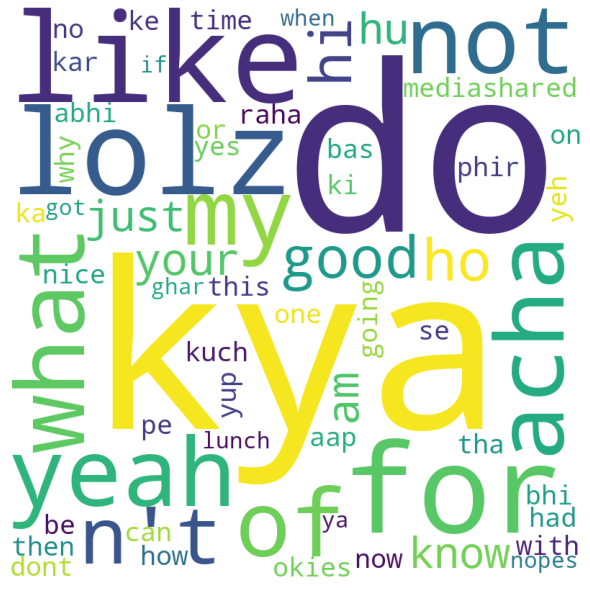

In [151]:

words_for_wordcloud = ' '.join([w[0] for w in fdist.most_common(100)])
wordcloud = WordCloud(width = 800, height = 800, stopwords=stopwords,
                background_color ='white',min_font_size = 10).generate(words_for_wordcloud) 
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

#### lets see more about the data

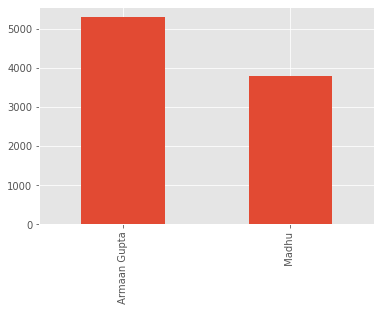

In [153]:
plt.style.use('ggplot')
new_df.Sender.value_counts().plot(kind='bar')

In [154]:
msg_count = new_df.Sender.value_counts()
print(msg_count.index)
msg_percent = (msg_count*100)/msg_count.sum()
msg_percent

Index([' Armaan Gupta', ' Madhu'], dtype='object')


 Armaan Gupta    58.26737
 Madhu           41.73263
Name: Sender, dtype: float64

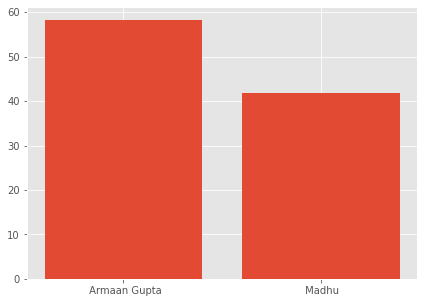

In [155]:
plt.figure(figsize=(7,5))
plt.bar(msg_count.index,msg_percent)
plt.show()

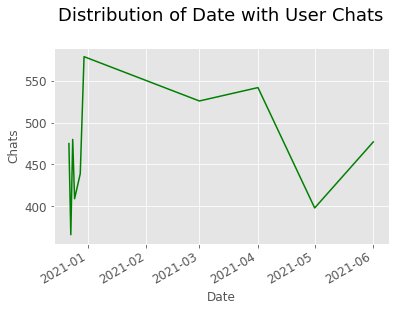

In [163]:

plt.style.use('ggplot')

date=df.groupby('Date')['Date'].count().nlargest(10)
def user_line_chart(date):
    ax = date.plot(kind='line',color='green', fontsize=12)
    ax.set_title("Distribution of Date with User Chats\n", fontsize=18)
    ax.set_xlabel("Date", fontsize=12)
    ax.set_ylabel("Chats", fontsize=12)
    plt.show()

user_line_chart(date)

In [164]:
import plotly.express as px
date_df = df.groupby('Date').sum()
date_df.reset_index(inplace=True)
date_df.rename(columns = {'Day':'MessageCount'}, inplace = True) 

fig = px.line(date_df, x="Date", y="MessageCount", title='Number of Messages as time moves on.')
fig.update_xaxes(nticks=20)
fig.show()


In [165]:
df.tail()

,Date,Time,Chat,Sender,Year,Month,Day
9102,2021-06-01,16:46,you cant eat me virtually na,Madhu,2021,6,1
9103,2021-06-01,16:46,i know,Armaan Gupta,2021,6,1
9104,2021-06-01,16:46,but i can imagine it na,Armaan Gupta,2021,6,1
9105,2021-06-01,16:46,hmm and what exactly are you imagining ?,Madhu,2021,6,1
9106,2021-06-01,16:47,paint me a picture with words,Madhu,2021,6,1


Text(0, 0.5, 'Date')

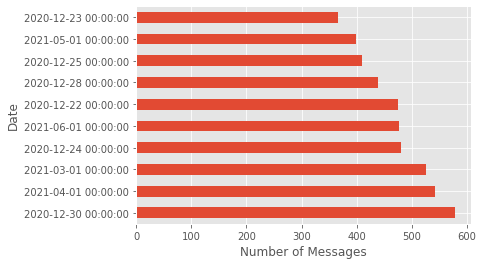

In [166]:
df['Date'].value_counts().head(10).plot.barh()
df['Date'].value_counts().head(10)
plt.xlabel('Number of Messages')
plt.ylabel('Date')

Text(0, 0.5, 'Number of messages')

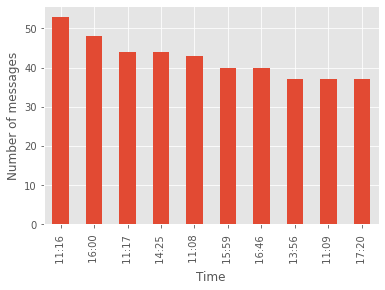

In [168]:
df['Time'].value_counts().head(10).plot.bar() 
plt.xlabel('Time')
plt.ylabel('Number of messages')